# Random Matrix Theory Visualizations

## Project Overview

### Introduction 

Over the years, the study of random matrices, also known as random matrix theory, has greatly influenced many disciplines ranging from statistical physics through the analysis of models for heavy nuclei atoms. RMT is a field of probability theory that studies matrices whose entries are random variables. RMT deals with the statistical properties of eigenvalues and eigenvectors, especially as the size of the matrices go to infinity. Random matrices can essentially be thought of as large matrices wgere each entry of the matrix is some random variable. Random matrix ensembles are groups of random matrices that share a common probability distribution. For example, a group of matrices where all the entries were some Gaussian/normal random variables would be a matrix ensemble. 

As a random matrix has a lot of randomness within in (much more than a random variable), when it comes to studying and visualizing random matrices, we need to introduce some structure to such matrices (the same way we do for random variables). The structure I will be studying in this notebook will be that of bands. Other structures include restricting the entries of the matrix to follow a particular distribution. For example, having all entries of the matrix be normally distributed. 

For the purpose of this study, we do both. We select only banded matrices where the bands are given by normal random variables. I will go into more detail to explain what a banded matrix is a bit later. 

First, to understand the basics we will look at the random matrix ensemble that is analogous to the normal random variable that we are used to studying. Then, we will look at banded matrices and end with a Toepliz matrix. 

### Background & Objectives

In this notebook, I will visualizing and analysing some important properties of 3 different random matrix ensembles. These will be 

1. Gaussian Random Matrices: Matrices whose entries are independent and identically distributed Gaussian (normal) random variables. 
2. Banded Random Matrices: Random matrices where the non-zero entries are confined to a diagonal band, surrounding the main diagonal.
3. Toeplitz Matrices: Matrices with main diagonal having one distribtuion and all the remaining matrix entries having the same distribution. 
The properties visualized will be the eigenvalue (spectral) density and the eigenvalue spacing. 

Eigenvalue density, often referred to as the spectral density, in random matrix theory describes the distribution of eigenvalues across the spectrum of a large random matrix. It essentially tells you how densely the eigenvalues are populated across different intervals on the real line or complex plane.

Eigenvalue spacing refers to the differences between consecutive eigenvalues of a matrix. In random matrix theory, the study of eigenvalue spacings involves analyzing the statistical properties of these differences, focusing on their distribution patterns.

Understanding how the eigenvalues are distributed as well as how the spaces between eignvalues change we can get useful insight into the nature of these matrices. Both these concepts are important and interlinked. As random matrices often model usful physical, statistical and financial properties, analysing the spacing and densities can be very useful.  

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Spectral Density of Gaussian Ensembles

The spectral density of Gaussian matrices is quite well known and is given by the semi circle law. One must note, however, that like all laws on such variables of probability densities, it is only at infinity that we converge to this law. For an analgous example to random variable theory, one can read up on the central limit theorem. 

In the following section, I plot the limiting spectral density (spectral density as the size of the matrix goes to infinity) along with the simulated spectral density of a large matrix. 

In [50]:
# Calculates the normalized histogram of the given data and returns the histogram counts
def histnorm(data, bins):
    counts, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return counts, bin_centers

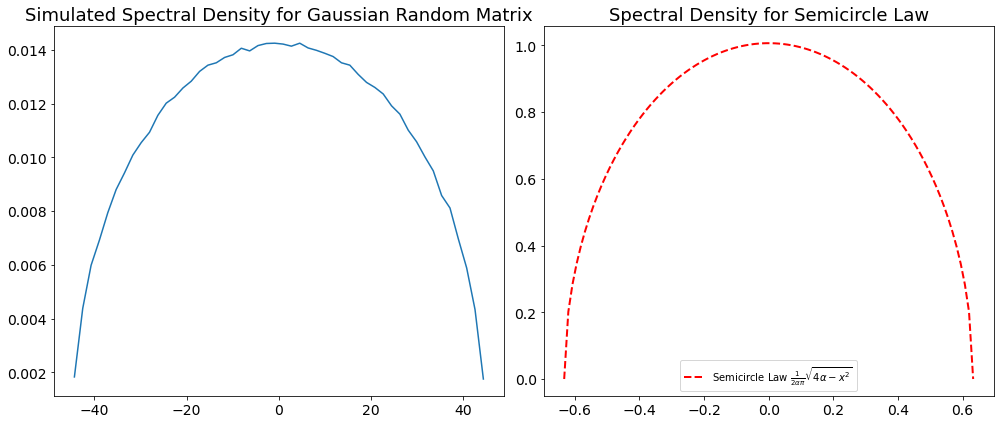

In [94]:
def gaussian_lsd(N, Nmatr):
    eigenvalues = []
    for _ in range(Nmatr):
        M = np.random.randn(N, N)
        M = 0.5 * (M + M.T)
        eigenvalues.extend(np.linalg.eigvalsh(M))
    return eigenvalues

def plot_gaussian_lsd(eigenvalues, alpha=0.1):
    # Normalized eigenvalue histogram
    b, a = histnorm(eigenvalues, 50)
    
    # Setup plots side by side
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plotting the normalized eigenvalue histogram
    ax[0].plot(a, b)
    ax[0].set_title('Simulated Spectral Density for Gaussian Random Matrix', fontsize=18)
    ax[0].tick_params(labelsize=14)
    
    # Calculating and plotting the semicircle law
    xxx = np.linspace(-2 * np.sqrt(alpha), 2 * np.sqrt(alpha), 100)
    yy = (1 / (2 * alpha * np.pi)) * np.sqrt(4 * alpha - xxx**2)
    ax[1].plot(xxx, yy, 'r--', linewidth=2, label=r'Semicircle Law $\frac{1}{2 \alpha \pi} \sqrt{4 \alpha - x^2}$')
    
    # Enhancing the second plot
    ax[1].set_title('Spectral Density for Semicircle Law', fontsize=18)
    ax[1].tick_params(labelsize=14)
    ax[1].legend()
    
    # Show plots side by side
    plt.tight_layout()
    plt.show()

# Parameters
N = 1000
Nmatr = 50

# Simulate eigenvalues and plot
eigenvalues = gaussian_lsd(N, Nmatr)
plot_spectral_density(eigenvalues)

As we can see here, for a 1000 x 1000 random matrix we almost converge to the semi circle law. What this essentially means is that the eigenvalues are distributed like a semi circle. Note that the difference in the axes here comes from the fact that in the right picture the eigenvalues are normalized. he graph shows that the density of eigenvalues is highest at the center of the matrix and decreases as we move away from the center towards the edges. 

### Spectral Density of Banded Matrix Ensembles 

A banded matrix is one that has non zero entries on one or a few diagonals and the remaining diagonals are all zero. Lets now look at the limiting spectral density of these banded matrices. Here I take 1 band. Note that the bands are filled up with entries of normal variables themselves so we will see some similarities to the Gaussian ensemble density. 

10000
Max: 6.32534364652759
Mean: -0.019
Var:  4.045


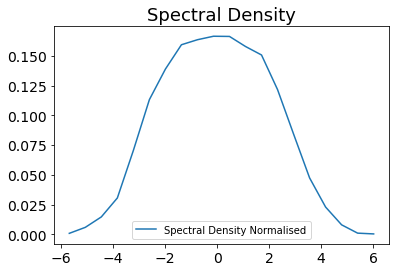

In [75]:
def banded_lsd(N, n_bands = -1):
    if n_bands == -1:
        n_bands = N

    # x is an empty list that will be used to collect all eigenvalues
    x = []

    Nmatr = int(max(1, 1e7/pow(N, 1.8)))
    Nmatr = 1
    # The following conditions select the proper ensemble
    for nm in range(Nmatr):
        mat = np.zeros((N, N))

        for band in range(min(n_bands, N - 1)):
            for i in range(N - band - 1):  
                mat[i][i+ band + 1] = mat[i + band + 1][i] = np.random.normal(loc=0, scale=np.sqrt(1), size=1)[0]

        for i in range(N):
            mat[i][i] = np.random.normal(loc=0, scale=np.sqrt(2), size=1)[0]
            
        mat /= np.sqrt(n_bands)
        x.extend(np.linalg.eigvalsh(mat))
    print(len(x))
    print("Max:", max(x))
    
    # Calculate histogram
    # Using the histnorm function to get normalized histogram data
    hist, bin_centers = histnorm(x, 20) 
    
    # Plotting the normalized histogram as a line plot
    plt.plot(bin_centers, hist, label='Spectral Density Normalised')
    print("Mean:", round(np.mean(x), 3))
    print("Var: ", round(np.var(x), 3))
    
    # Enhancing the plot
    plt.title('Spectral Density', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend()
    
    plt.show()

banded_lsd(10000, 1)

Again we see some of the similar properties where the Larger frequency appears to be in the middle with eigenvalues being less frequent at the edges. However the smooth semi circular nature has gone. We also see a small drop it values at exactly 0 indicative of some repulsion effects of the eigenvalues (which we will look at in more detail later). Another important thing to note here is the presence of the mean and sd values. The entries were filled with variables with mean 0. Hence the mean of this curve too corresponds to the mean of the entries. However, the sd is significantly different from the sd of 1 that the variables had. We will see a similar change in the Toeplitz matrix as well. 

### Spectral Density of the Toeplitz Matrix

A Toeplitz matrix can essentially be thought of as a more general version of the banded matrix (with less structure) as we have non zero multiple bands that extend all the way till the dimensions of the matrix. Therefore, as there are less non zero elements, there is more randomness. The percentile parameter is added to remove out extreme and anomalous eigenvalues.

In [ ]:
# Filters numbers that are within a given percentile of the absolute differences from the median.
def filter_numbers_close_to_median(numbers, percentile):
    median = np.median(numbers)
    absolute_differences = [abs(num - median) for num in numbers]
    threshold = np.percentile(absolute_differences, percentile)
    filtered_numbers = [num for num in numbers if abs(num - median) <= threshold]
    return filtered_numbers

100
Max: 4.512836737660108
Mean: -0.012
Var:  2.985


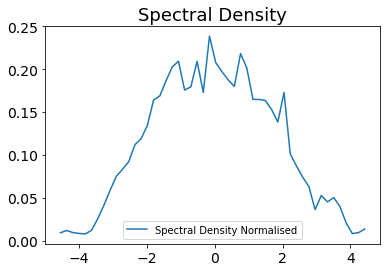

In [51]:
# Generates and plots the Limiting Spectral Density (LSD) for a Toeplitz matrix with specified parameters.
def toeplitz_lsd(N, n_bands = -1, percentile=97.5):
    if n_bands == -1:
        n_bands = N

    # x is an empty list that will be used to collect all eigenvalues
    x = []

    Nmatr = int(max(1, 1e7/pow(N, 1.8)))
    Nmatr = 100
    # The following conditions select the proper ensemble
    for nm in range(Nmatr):
        mat = np.zeros((N, N))
    
        diag = np.random.normal(loc=0, scale=np.sqrt(1), size=1)[0]
        other = np.random.normal(loc=0, scale=np.sqrt(1), size=1)[0]

        for band in range(min(n_bands, N - 1)):
            for i in range(N - band - 1):  
                mat[i][i+ band + 1] = mat[i + band + 1][i] = other
        np.fill_diagonal(mat, diag)
        x.extend(np.linalg.eigvalsh(mat))

    x = filter_numbers_close_to_median(x, percentile)

    print("Max:", max(x))
    
    # Calculate histogram
    hist, bin_centers = histnorm(x, 50)
    
    # Plotting the normalized histogram as a line plot
    plt.plot(bin_centers, hist, label='Spectral Density Normalised')
    
    print("Mean:", round(np.mean(x), 3))
    print("Var: ", round(np.var(x), 3))
    
    # Enhancing the plot
    plt.title('Spectral Density', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend()
    
    plt.show()
    
toeplitz_lsd(1000, 1)

This again shows some similarities to the Gaussian density; however, it is clearly way less smooth and has a lot of spikes at various points. There seems to be a more sharp cutoff aftr -2 and 2. Once again, the mean corresponds to the entries' means, but the sd does not. 

## Eigenvalue Spacing of Gaussian Random Matrices

Eigenvalue spacing is also an important concept as eigenvalues have a tendency of repelling each other. Therefore seeing how the spacing changes tells us about the repulsion effects of the eigenvalues. This property is particularly important in fields of statistical physics. 

### Eigenvalue spacing for scaled and unscaled 2x2 normal Gaussian Matrices

Below is simply a short demonstration of how unscaled and scaled(normlaized) matrices eignevalue spacings look like. Most papers simply look at normalized versions; however, it is intersting to see how the actual spacing looks as well. Therefore before looking at eigenvalue spacings, I plotted out the difference in unscaled and scaled spacing graphs. For the rest of this paper, I will simply look at graphs that have a normalized eigenvalue spacing. 

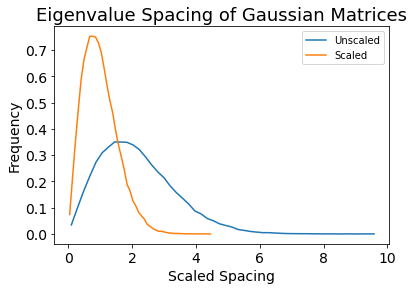

In [93]:
def unscal_scal_spacing(samples=100000, matrix_size=2, sym_mean=0.0, sym_var=0.5, diag_mean=0.0, diag_var=2.0, bins=50):
    distances = []

    for _ in range(samples):
        mat = np.zeros((matrix_size, matrix_size))
        mat[0][1] = mat[1][0] = np.random.normal(loc=sym_mean, scale=np.sqrt(sym_var), size=1)[0]
        mat[0][0] = np.random.normal(loc=diag_mean, scale=np.sqrt(diag_var), size=1)[0]
        mat[1][1] = np.random.normal(loc=diag_mean, scale=np.sqrt(diag_var), size=1)[0]
        distances.append(np.abs(np.diff(np.linalg.eigvalsh(mat)))[0])
    
    b, a = histnorm(distances, bins)
    s_bar = np.mean(distances)

    plt.plot(a, b, label="Unscaled")
    plt.plot(a / s_bar, b * s_bar, label="Scaled")
    plt.title('Eigenvalue Spacing of Gaussian Matrices', fontsize=18)
    plt.legend(loc="upper right")
    plt.xlabel('Scaled Spacing', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

unscal_scal_spacing()

As you can see here, the scaled graph is a lot wider and shorter and has a peak at 2 which a steady decline and a gentler gradient. Meanwhile, the normalized version has a large peak at 1 and steep declines either side. Note that both graphs need have a frequenct of 0 at a spacing of 0 and steady declines as you approach zero. This is due to the eigenvalue repulsion effects spoken about earlier. Also note in both cases after a certiain point the eigenvalue spacing drops to the right as the spacing can't be too far apart given our matrix size is limited. 

### Eigenvalue spacing for nxn Gaussian Matrices 

We now look at the spacing for normalized Gaussian matrices as the size of the matrix changes

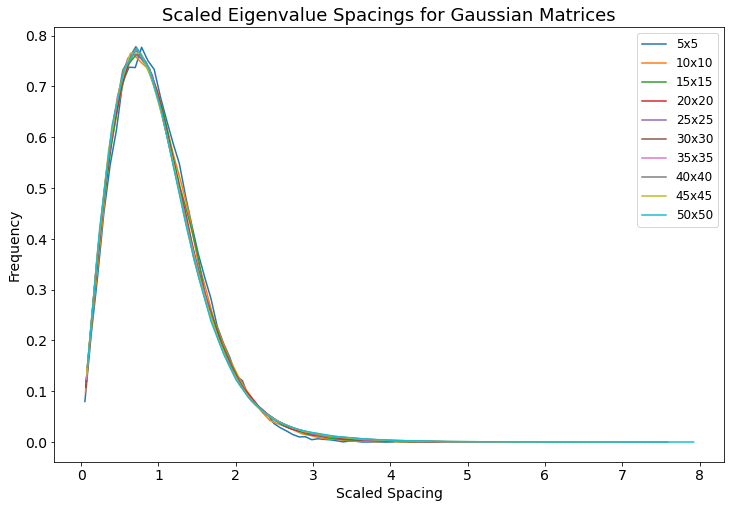

In [92]:
def get_gauss_spacing(matrix_size, samples=10000, mean=0.0, var=1.0, bins=50):
    distances = []
    # Generate matrices and compute eigenvalue differences
    for _ in range(samples):
        mat = np.random.normal(loc=mean, scale=np.sqrt(var), size=(matrix_size, matrix_size))
        mat = (mat + mat.T) / 2  # Making the matrix symmetric
        eigenvalues = np.linalg.eigvalsh(mat)
        spacings = np.diff(np.sort(eigenvalues))
        distances.extend(spacings)
    # Create histogram of eigenvalue spacings     
    hist, bin_centers = histnorm(distances, bins)
    s_bar = np.mean(distances)
    
    return bin_centers / s_bar, hist * s_bar

def plot_gauss_spacing(start=5, end=50, step=5, samples=10000, mean=0.0, var=1.0, bins=50):
    plt.figure(figsize=(12, 8))
    
    for size in range(start, end + 1, step):
        scaled_bin_centers, scaled_hist = get_gauss_spacing(size, samples, mean, var, bins)
        plt.plot(scaled_bin_centers, scaled_hist, label=f"{size}x{size}")

    plt.title('Scaled Eigenvalue Spacings for Gaussian Matrices', fontsize=18)
    plt.xlabel('Scaled Spacing', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(loc="upper right", fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Run the function to compare matrices from 5x5 to 50x50
plot_gauss_spacing()

As one can see here, the size of the matrix plays no role on the distribution of the eigenvalue spacing for Gaussian matrices.

## Eigenvalue spacng for nxn Banded Matrices with only the diagonal filled   

Now we look at the simplest case of banded matrices, where only the diagonal band has values given by a Gaussian distribtution. The remaining matrix has all zeroes. 

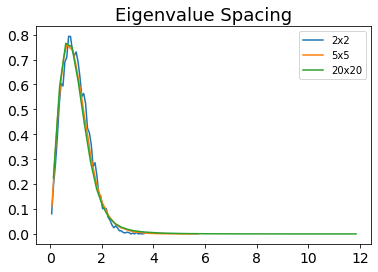

In [91]:
def get_banded_diag(eigen_mean, eigen_var, sym_mean, sym_var, normalize, n):
    distances = []
    # Generate matrices and compute eigenvalue differences
    for _ in range(10000):
        mat = np.zeros((n, n))
        np.fill_diagonal(mat, np.random.normal(loc=eigen_mean, scale=np.sqrt(eigen_var), size=n))
        
        for i in range(n):
            for j in range(i+1, n): 
                val = np.random.normal(loc=sym_mean, scale=np.sqrt(sym_var), size=1)[0]
                mat[i][j] = val
                mat[j][i] = val

        distances.extend(np.diff(np.sort(np.linalg.eigvalsh(mat))))
    
    # Create histogram of eigenvalue spacings        
    y, x = histnorm(distances, 50)
    s_bar = np.mean(distances)
    
    # Normalize histogram
    if normalize:
        x /= s_bar
        y *= s_bar
    return x, y


def plot_banded_diag(values, normalize):
    labels = ["2x2", "5x5", "200x200"]
    for idx, value in enumerate(values):
        eigen_mean, eigen_var, sym_mean, sym_var, n = value
        x, y = get_banded_diag(eigen_mean, eigen_var, sym_mean, sym_var, normalize=normalize, n=n)
        plt.plot(x, y, label=f'{labels[idx]}')
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('Eigenvalue Spacing', fontsize=18)
    plt.legend(loc="upper right")
    plt.show()

plot_gauss(
    [
        [0, 1, 0, 0.5, 2],  
        [0, 1, 0, 0.5, 20],
        [0, 1, 0, 0.5, 200]
        
    ],
    normalize=True
)

As one can see here, the eigenvalue spacing of this banded matrix very closely resembles that of the Guassian spacing, show how much importance the diagonal band plays in determining the probability density. Despite the fact that we have increasing number of zeroes in the 3 graphs, the shape still stays as that of the Gaussian, highlighting how important the diagonal is. The fact that the remaining entries are all zeroes also makes a big difference as the effetcs of the eigenvalues only come from the diagonal. If we were to change the off diagonals as well we are adding more randomness and hence the distirbution may look different. We see that next. 

## Eigenvalue Spacing of nxn Banded Matrices with changing off-Diagonal Bands

For banded matrix we will observe that, as the entries are normal, as the number of off-diagonal bands increases we will get a more Gaussian spacing. Note that we are now looking at the off-diagonal bands and seeing how increasing the number of these bands changes the spacing distribution. 

### Eigenvalue Spacing of Banded Matrices with different off-diagonal Band Lengths

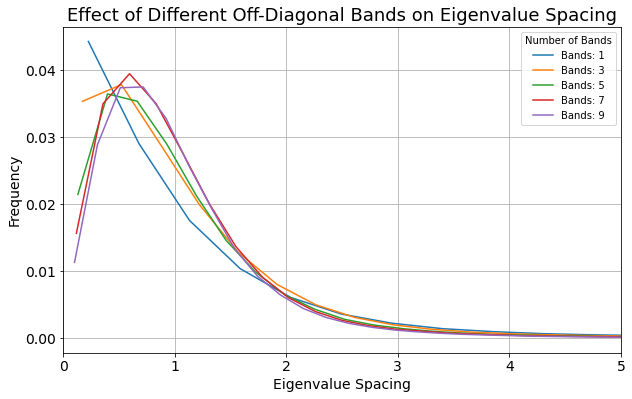

In [90]:
def get_banded_offdiag(eigen_mean, eigen_var, sym_mean, sym_var, normalize, n_bands, n):
    distances = []
    # Generate matrices and compute eigenvalue differences
    for _ in range(10000):
        mat = np.zeros((n, n))
        np.fill_diagonal(mat, np.random.normal(loc=eigen_mean, scale=np.sqrt(eigen_var), size=n))
        
        # Populate off-diagonal bands symmetrically
        for band in range(min(n_bands, n - 1)):
            for i in range(n - band - 1):
                val = np.random.normal(loc=sym_mean, scale=np.sqrt(sym_var), size=1)[0]
                mat[i][i + band + 1] = val
                mat[i + band + 1][i] = val

        # Calculate spacings between sorted eigenvalues
        distances.extend(np.diff(np.sort(np.linalg.eigvalsh(mat))))

    # Create histogram of eigenvalue spacings
    y, x = np.histogram(distances, bins=50)
    s_bar = np.mean(distances)
    
    # Normalize histogram
    if normalize:
        x = (x - x[0]) / s_bar  # Normalize x-axis by mean spacing
        y = y.astype(float) / np.sum(y) * s_bar  # Normalize y-axis to maintain area

    return x[:-1] + np.diff(x)/2, y

def plot_banded_offdiag(values, normalize):
    plt.figure(figsize=(10, 6))
    for idx, value in enumerate(values):
        eigen_mean, eigen_var, sym_mean, sym_var, n_bands, n = value
        x, y = get_banded_offdiag(eigen_mean, eigen_var, sym_mean, sym_var, normalize=normalize, n_bands=n_bands, n=n)
        plt.plot(x, y, label=f'Bands: {n_bands}')

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Eigenvalue Spacing', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlim([0, 5])
    plt.title('Effect of Different Off-Diagonal Bands on Eigenvalue Spacing', fontsize=18)
    plt.legend(title='Number of Bands', loc="upper right")
    plt.grid(True)
    plt.show()

# Example usage
plot_banded_offdiag(
    [
        [0, 1, 0, 0.5, 1, 50], 
        [0, 1, 0, 0.5, 3, 50],  
        [0, 1, 0, 0.5, 5, 50], 
        [0, 1, 0, 0.5, 7, 50], 
        [0, 1, 0, 0.5, 9, 50], 
    ],
    normalize=True
)

Here we can see that for bands 1 and 2, the distribution actually looks very different than the other bands. We can also see that as the number of bands increases, we get closer and closer to a Guassian curve. This makes intutitive sense as the number of bands are also Guassians and we have set the parameters of the Gaussians as equal.  

## Eigenvalue Spacing of Banded Matrices with Exponential Decay of band lengths

Here we look at a Banded but decaying matrix, hence the bands kept getting smaller and smaller as one moves away from the main diagonal.

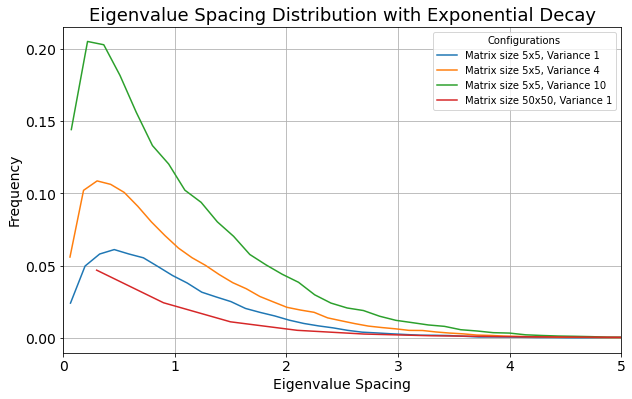

In [88]:
def get_banded_spacing_decay(eigen_mean, eigen_var, sym_mean, sym_var, normalize, n):
    distances = []
    for _ in range(10000):
        mat = np.zeros((n, n))
        # Fill matrix with exponentially decaying elements
        for i in range(n):
            for j in range(n):
                decay_multiplier = np.exp(-abs(i - j))
                if i == j:
                    mat[i][j] = np.random.normal(loc=eigen_mean, scale=np.sqrt(eigen_var)) * decay_multiplier
                else:
                    mat[i][j] = np.random.normal(loc=sym_mean, scale=np.sqrt(sym_var)) * decay_multiplier

        # Calculate differences between consecutive sorted eigenvalues
        distances.extend(np.diff(np.sort(np.linalg.eigvalsh(mat))))
        
    # Create histogram of eigenvalue spacings
    y, x = np.histogram(distances, bins=50)
    s_bar = np.mean(distances)
    
    # Normalize histogram
    if normalize:
        x = (x - x[0]) / s_bar  # Normalize x-axis by mean spacing
        y = y.astype(float) / np.sum(y) * s_bar  # Normalize y-axis to maintain area

    return x[:-1] + np.diff(x)/2, y

def plot_banded_spacing_decay(values, normalize):
    plt.figure(figsize=(10, 6))
    for idx, value in enumerate(values):
        eigen_mean, eigen_var, sym_mean, sym_var, n = value
        x, y = get_banded_spacing_decay(eigen_mean, eigen_var, sym_mean, sym_var, normalize=normalize, n=n)
        plt.plot(x, y, label=f'Matrix size {n}x{n}, Variance {eigen_var}')

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Eigenvalue Spacing', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlim([0, 5])
    plt.title('Eigenvalue Spacing Distribution with Exponential Decay', fontsize=18)
    plt.legend(title='Configurations', loc="upper right")
    plt.grid(True)
    plt.show()

plot_banded_spacing_decay(
    [
        [0, 1, 0, 0.5, 5], 
        [0, 4, 0, 0.5, 5],
        [0, 10, 0, 0.5, 5],
        [0, 1, 0, 0.5, 50], 
    ],
    normalize=True
)

This visualization highlights two main things. First, we can see the effect of changing the variance (this is important because the decay multiplier that we encoded is based on the variance). We see that for different variances, as the variance increases the frequency increases with a sharper drop when appproaching zero. The second thing we see is that the shape of the eigenvalue spacing as the matrix size increases is again different from the smaller matrices, with the smaller matrices having a more Guassian looking shape. The 50x50 matrix is similar to the case of the small number of off-diagonal bands (which makes sense since as you move further out the decay multipler gets larger). 

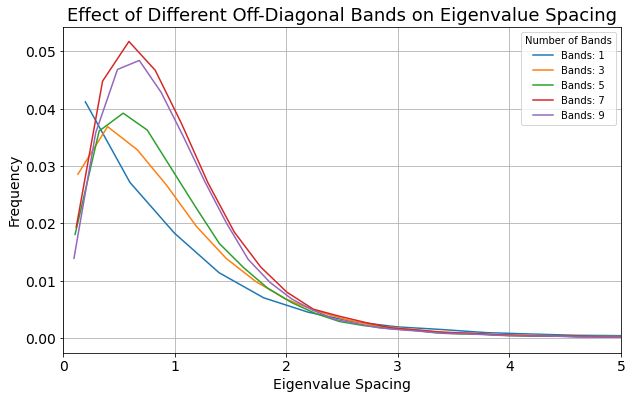

In [87]:
def toeplitz_spacing(eigen_mean, eigen_var, normalize, n_bands, n, percentile=97.5):
    distances = []
    # Generate matrices and compute eigenvalue differences
    for _ in range(1000):
        mat = np.zeros((n, n))
        
        diag = np.random.normal(loc=0, scale=np.sqrt(1), size=1)[0]
        other = np.random.normal(loc=0, scale=np.sqrt(1), size=1)[0]
        
        
        # Populate off-diagonal bands 
        for band in range(min(n_bands, n - 1)):
            for i in range(n - band - 1):
                other = np.random.normal(loc=0, scale=np.sqrt(1), size=1)[0]
                mat[i][i + band + 1] = mat[i + band + 1][i] = other
                
        np.fill_diagonal(mat, diag)

        # Calculate spacings between sorted eigenvalues
        distances.extend(np.diff(np.sort(np.linalg.eigvalsh(mat))))
        
    x = filter_numbers_close_to_median(distances, percentile)

    # Create histogram of eigenvalue spacings
    y, x = np.histogram(distances, bins=50)
    s_bar = np.mean(distances)
    
    # Normalize histogram
    if normalize:
        x = (x - x[0]) / s_bar  # Normalize x-axis by mean spacing
        y = y.astype(float) / np.sum(y) * s_bar  # Normalize y-axis to maintain area

    return x[:-1] + np.diff(x)/2, y

def plot_toeplitz_spacing(values, normalize):
    plt.figure(figsize=(10, 6))
    for idx, value in enumerate(values):
        eigen_mean, eigen_var, n_bands, n = value
        x, y = toeplitz_spacing(eigen_mean, eigen_var, normalize=normalize, n_bands=n_bands, n=n)
        plt.plot(x, y, label=f'Bands: {n_bands}')

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Eigenvalue Spacing', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlim([0, 5])
    plt.title('Effect of Different Off-Diagonal Bands on Eigenvalue Spacing', fontsize=18)
    plt.legend(title='Number of Bands', loc="upper right")
    plt.grid(True)
    plt.show()

# Example usage
plot_toeplitz_spacing(
    [
        [0, 1, 1, 50], 
        [0, 1, 3, 50], 
        [0, 1, 5, 50], 
        [0, 1, 7, 50], 
        [0, 1, 9, 50], 
    ],
    normalize=True
)

Here we can see how the toeplitz eigenvalue spacing looks quite similar to the banded one. Once again, you can see the repulsion from the fact that the highest frequency occurs before 0 and there is a sharp decline nearing 0. Also the shapes hear appear a lot more gaussian (as all the remaining diagonals barring the main one are filled with the same Gaussian distribtuion). 

## Conclusion 

To conclude, we can see how the eigenvalue densities and spacings change as the types and features of some similar matrix change. The spectral spacings and densities of all the matrices have some similarities due to the fact that the marix entries are all normally distributed random variables or set to 0. 

The next step is a more pure mathematical one, where we work to come up with a law that describves the limiting spectral distribution of some banded matrics or Toeplitz matrices the same way the semi circle law exists for Gaussian matrices. 

Visualizing these strctures and their differences and similarities makes it a lot easiert to understand how to derive such a law based on the behaviour of the eigenvalues. 

For other similar topics, one can also look at large deviation principles of such matrices. 